# Exercise 05


## Using the example_retail_sales dataset:
- Standarize the dataset using np.log
- Using prophet forescast the next 6 months of the sales logarithm
- Predict the next 6 months of sales

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Ser = pd.read_csv('example_retail_sales.csv',header=0, parse_dates=[0], index_col=0, squeeze=True)
#df = pd.DataFrame()
#df['ds'] = pd.to_datetime(Ser['ds'])
#df['y'] = passengers['y']
Ser =  np.log(Ser)

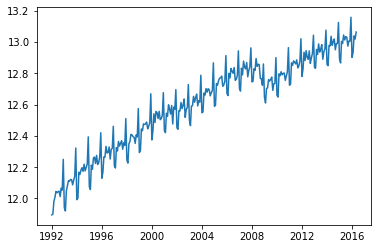

In [2]:
plt.plot(Ser);

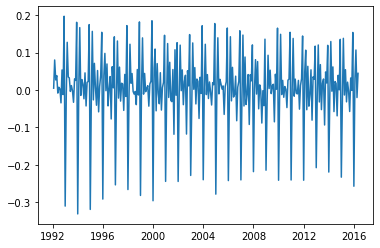

In [3]:
plt.plot(Ser.diff());

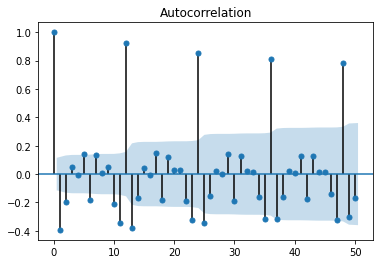

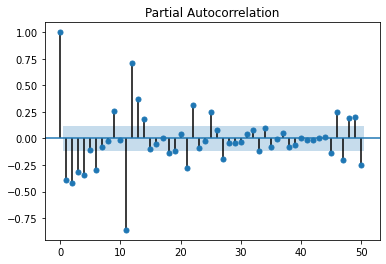

In [5]:
# Realizamos las graficas de Correlaciones
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plot_acf(Ser_diff, lags=50)
plot_pacf(Ser_diff, lags=50);


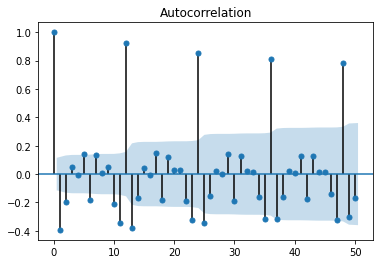

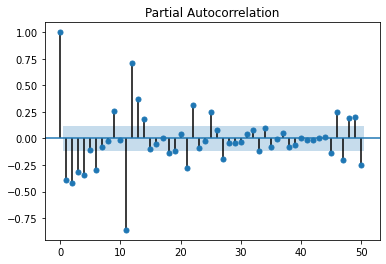

In [240]:

# Generamos un grid de evaluacion para obtener los mejores parametros para el modelo ARIMA

from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

 
# Se define esta funcion que genera un melo ARIMA, con los argumentos de un dataset y un orden(p,d,q)
def evaluate_arima_model(X, arima_order):
	# Se dividie el dataset en train y test
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# Se realizan las predicciones
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# Se calcula media del cuadrado del error
	error = mean_squared_error(test, predictions)
	# La funcion retorna el error
	return error
 
# Se define esta funcion que evalua varias combinaciones de p, d y q para un dataset y evalua sus correspondientes modelos ARIMA, y guarda el valor del orden que minimiza el MSE
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
 
p_values = range(0,12)
d_values = range(0, 2)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(Ser.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=0.135
ARIMA(0, 0, 1) MSE=0.050
ARIMA(0, 0, 2) MSE=0.030
ARIMA(0, 1, 0) MSE=0.008
ARIMA(0, 1, 1) MSE=0.006
ARIMA(0, 1, 2) MSE=0.006
ARIMA(1, 0, 0) MSE=0.009
ARIMA(1, 0, 1) MSE=0.005
ARIMA(1, 0, 2) MSE=0.005
ARIMA(1, 1, 0) MSE=0.007
ARIMA(1, 1, 1) MSE=0.006
ARIMA(1, 1, 2) MSE=0.006
ARIMA(2, 0, 0) MSE=0.007
ARIMA(2, 0, 1) MSE=0.005
ARIMA(2, 0, 2) MSE=0.005
ARIMA(2, 1, 0) MSE=0.006
ARIMA(2, 1, 1) MSE=0.006
ARIMA(2, 1, 2) MSE=0.006
ARIMA(3, 0, 0) MSE=0.006
ARIMA(3, 0, 1) MSE=0.005
ARIMA(3, 1, 0) MSE=0.005
ARIMA(3, 1, 1) MSE=0.006
ARIMA(3, 1, 2) MSE=0.006
ARIMA(4, 0, 0) MSE=0.005
ARIMA(4, 0, 1) MSE=0.005
ARIMA(4, 1, 0) MSE=0.005
ARIMA(4, 1, 1) MSE=0.006
ARIMA(4, 1, 2) MSE=0.005
ARIMA(5, 0, 0) MSE=0.005
ARIMA(5, 0, 1) MSE=0.005
ARIMA(5, 0, 2) MSE=0.005
ARIMA(5, 1, 0) MSE=0.005
ARIMA(5, 1, 1) MSE=0.006
ARIMA(6, 0, 0) MSE=0.005
ARIMA(6, 0, 1) MSE=0.005
ARIMA(6, 1, 0) MSE=0.005
ARIMA(6, 1, 1) MSE=0.005
ARIMA(7, 0, 0) MSE=0.004
ARIMA(7, 0, 1) MSE=0.004
ARIMA(7, 1, 0) MSE=0.005


In [241]:
p_values = range(12,15)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(Ser.values, p_values, d_values, q_values)

ARIMA(12, 0, 0) MSE=0.002
ARIMA(12, 0, 1) MSE=0.001


In [13]:
# Hallado el orden que mejor modela los datos (Reduciendo el MSE),prodeceremos a ajustar el modelo

# fit model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Ser, order=(12,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  292
Model:                ARIMA(12, 1, 0)   Log Likelihood                 669.831
Method:                       css-mle   S.D. of innovations              0.023
Date:                Mon, 22 Jun 2020   AIC                          -1311.661
Time:                        10:36:03   BIC                          -1260.187
Sample:                    02-01-1992   HQIC                         -1291.043
                         - 05-01-2016            

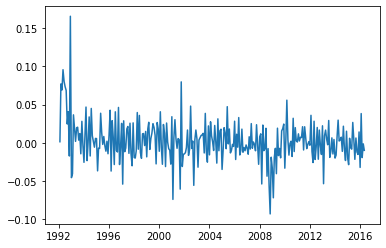

In [16]:
import matplotlib.pyplot as plt

residuals = pd.DataFrame(model_fit.resid)
plt.plot(residuals)

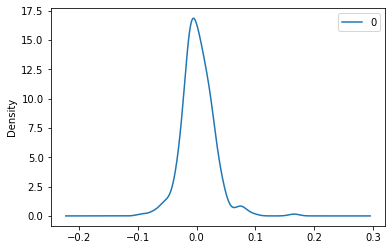

0
count  292.000000
mean     0.002070
std      0.027387
min     -0.093380
25%     -0.012941
50%      0.001065
75%      0.017890
max      0.165781


In [17]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [24]:
# Tomamos valores de la serie (solo valores)
X = Ser.values
# Definir el tamaño (numero de datos) de la muestra
size = int(len(X) * 0.9)
# Parte el train y test
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(12,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast() #pronostica un solo dato
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=13.070689, expected=13.075701
predicted=12.878914, expected=12.856832
predicted=12.864376, expected=12.848755
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
predicted=12.971123, expected=12.978045
predicted=12.944753, expected=12.974826
predicted=13.034732, expected=13.036418
predicted=12.975084, expected=12.978844
predicted=12.993245, expected=13.001336
predicted=13.031992, expected=13.019030
predicted=12.927685, expected=12.950082
predicted=12.998402, expected=12.989294
predicted=13.013587, expected=12.989769
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
predicted=13.109369, expected=13.124824
predicted=12.913207, expected=12.892326
C:\Users\Lenovo\Anaconda

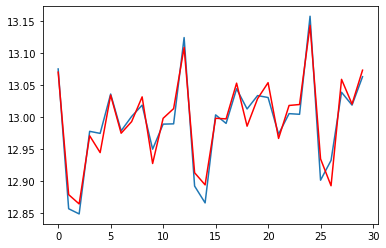

In [25]:
# Graficamos las predicciones de los logaritmos de las ventas
plt.plot(test)
plt.plot(predictions, color="red")

Procederemos ahora a obtener los valores de las ventas

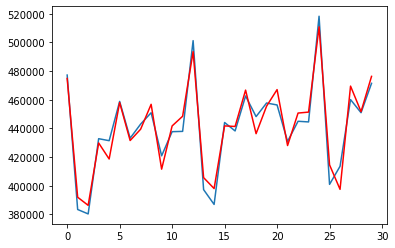

In [26]:
sales_pred = np.exp(predictions)
sales_test = np.exp(test)
plt.plot(sales_test)
plt.plot(sales_pred, color="red")

# Modelado con Propthet

In [189]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [188]:
df = pd.read_csv('example_retail_sales.csv')
df = pd.DataFrame()
df.info()
#df['ds'] = pd.to_datetime(df['ds'])
#df['y'] = passengers['y']
#Ser =  np.log(Ser)

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame

In [178]:
m = Prophet()
m.fit(Ser)

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

In [179]:
future = m.make_future_dataframe(periods=12 * 6, freq='M')
future.tail()

Exception: Model has not been fit.

In [180]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

Exception: Model has not been fit.

In [181]:
fig1 = m.plot(forecast)

TypeError: 'NoneType' object is not subscriptable

In [182]:
m.plot_components(forecast);

TypeError: 'NoneType' object is not subscriptable

In [183]:
forecast.yhat

0      128754.511553
1      133495.683626
2      169420.641245
3      162881.203882
4      179415.480205
5      170984.468894
6      171670.061134
7      178913.111121
8      159049.926762
9      169926.723716
10     171959.754484
11     218887.679700
12     145594.397739
13     139974.050634
14     180083.140063
15     174703.051535
16     191646.891723
17     183755.421484
18     184529.990533
19     191670.969724
20     170917.209024
21     181025.980688
22     183797.125195
23     233320.712081
24     156373.728960
25     154212.235146
26     190711.439293
27     186545.721031
28     203896.166433
29     196542.333405
           ...      
335    582367.423048
336    484783.876898
337    503581.681308
338    525353.424262
339    524170.987424
340    542701.082233
341    536805.858643
342    538101.904641
343    545183.885111
344    522203.352788
345    530569.159616
346    536194.484362
347    593394.887440
348    506116.820818
349    514687.910600
350    540502.495503
351    540695

In [184]:
m=Prophet()
m.fit(train_df)
future = m.make_future_dataframe(periods=prediction_size, freq="D")
forecast = m.predict(future)
forecast.head();

NameError: name 'train_df' is not defined

In [185]:
fig2 = m.plot(forecast)

TypeError: 'NoneType' object is not subscriptable

In [186]:
df.tail()

""
